In [1]:
import json
from datetime import datetime
from pathlib import Path

import numpy as np

from trial import Trial, load_trials
from utils import SetUpstreamSteererAtStep


# Notebook for Shift with Chenran

Shift on  28 and 29 September 2022 for testing Bayesian Optimisation (BO) against Reinforcement Learning (RL).

Once we know BO is working in the machine, the plan is to test BO and RL in pairs on the same problems (targets) and compare their performance in the real world.

In [2]:
# Define target (and thresholds) ... max steps is chosen seperately for each algorithm
# comment = "test"

# target_mu_x = 0.0
# target_sigma_x = 0.0
# target_mu_y = 0.0
# target_sigma_y = 0.0

# target_mu_x_threshold = 3.3198e-6
# target_mu_y_threshold = 3.3198e-6
# target_sigma_x_threshold = 3.3198e-6
# target_sigma_y_threshold = 3.3198e-6


In [14]:
# # Load problem
trial_index = 33

trials = load_trials(Path("trials.yaml"))

comment = f"trial_{trial_index:03d}"

# Note that the indicies are still according to the old order mu_x, mu_y, sigma_x, sigma_y
target_mu_x = trials[trial_index].target_beam[0]
target_sigma_x = trials[trial_index].target_beam[1]
target_mu_y = trials[trial_index].target_beam[2]
target_sigma_y = trials[trial_index].target_beam[3]
target_mu_x_threshold = 3.3198e-9
target_mu_y_threshold = 3.3198e-9
target_sigma_x_threshold = 3.3198e-9
target_sigma_y_threshold = 3.3198e-9


In [4]:
from ea_optimize import ARESEADOOCS

env = ARESEADOOCS(magnet_init_mode="constant", magnet_init_values=np.zeros(5))
env.reset()


initializing ocelot...


{'beam': array([ 0.00103412,  0.00052581, -0.00083806,  0.00039587], dtype=float32),
 'magnets': array([-2.5818379e-11, -2.5818379e-11,  8.1280665e-14, -2.5818379e-11,
         8.1175511e-14], dtype=float32),
 'target': array([-0.00103687,  0.00154012, -0.00086136,  0.00188682], dtype=float32)}

 50%|█████     | 40/80 [07:10<07:17, 10.95s/it]

Triggering disturbance


81it [15:41, 11.63s/it]                        


title = 'Beam Optimisation on AREABSCR1 using Bayesian Optimisation'
msg = 'Bayesian Optimisation optimised beam on AREABSCR1\n\nAgent: Bayesian Optimisation\nStart time: 2022-12-20 16:27:58.184258\nTime taken: 0:15:50.476849\nNo. of steps: 81\n\nBeam before:\n    mu_x    =  1.0391 mm\n    sigma_x =  0.5300 mm\n    mu_y    = -0.8271 mm\n    sigma_y =  0.3928 mm\n\nBeam after:\n    mu_x    = -1.0773 mm\n    sigma_x =  0.0465 mm\n    mu_y    = -2.1508 mm\n    sigma_y =  0.0686 mm\n\nTarget beam:\n    mu_x    = -1.0984 mm    (e = 0.0033 mm) :/\n    sigma_x =  0.2279 mm    (e = 0.0033 mm) :/\n    mu_y    = -1.9133 mm    (e = 0.0033 mm) :/\n    sigma_y =  0.1967 mm    (e = 0.0033 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0212 mm\n    |delta_sigma_x| =  0.1814 mm\n    |delta_mu_y|    =  0.2375 mm\n    |delta_sigma_y| =  0.1282 mm\n\n    MAE =  0.1420 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   6.8649 1/m^2\n    AREAMQZM2 strength = -15.7375 1/m^2\n    AREAMCVM1 kick     =  -0.

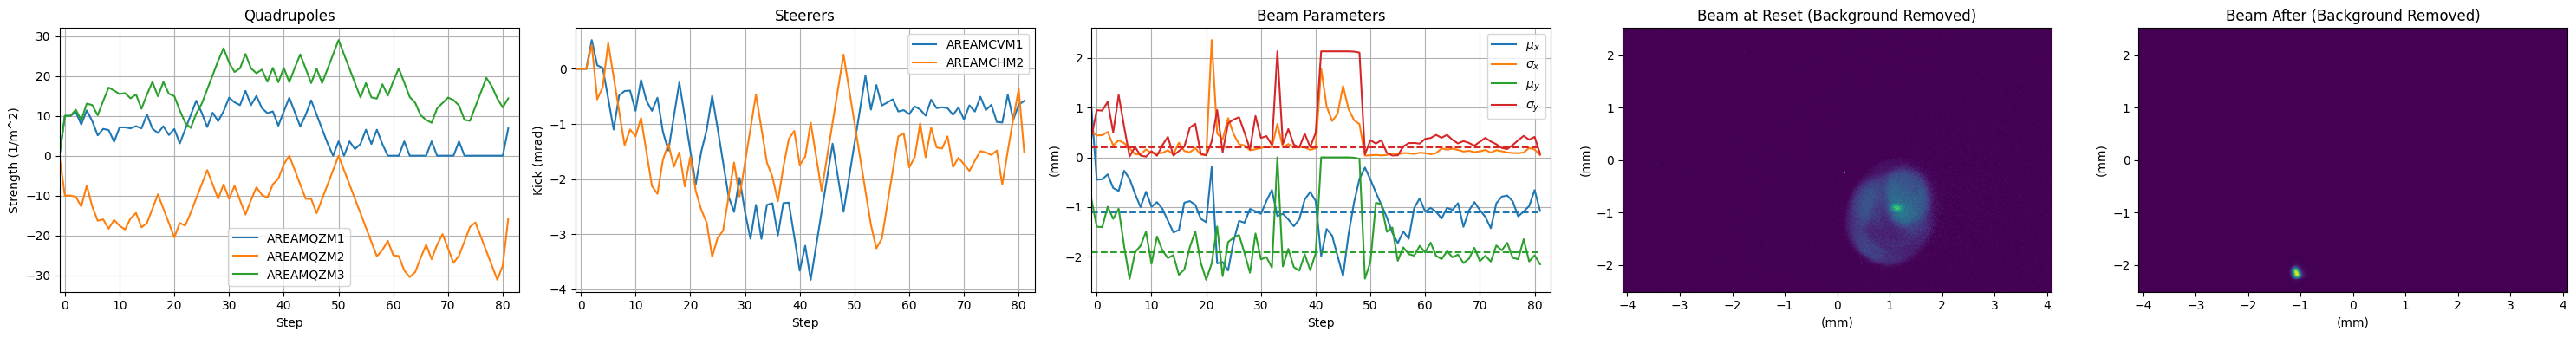

In [5]:
# Bayesian Optimisation
from ea_bo import optimize

optimize(
    target_mu_x=target_mu_x,
    target_sigma_x=target_sigma_x,
    target_mu_y=target_mu_y,
    target_sigma_y=target_sigma_y,
    target_mu_x_threshold=target_mu_x_threshold,
    target_mu_y_threshold=target_mu_y_threshold,
    target_sigma_x_threshold=target_sigma_x_threshold,
    target_sigma_y_threshold=target_sigma_y_threshold,
    max_steps=80,
    model_name="Bayesian Optimisation",
    logbook=True,
    data_log_dir=f"data/bo_vs_rl/real/bo/{datetime.now():%Y%m%d%H%M}_{comment}",
    progress_bar=True,
    callback=None,
    acquisition="EI",
    init_x=None,
    init_samples=5,
    filter_action=None,
    magnet_init_values=np.array([10, -10, 0, 10, 0]),
)


In [15]:
from ea_optimize import ARESEADOOCS

env = ARESEADOOCS(magnet_init_mode="constant", magnet_init_values=np.zeros(5))
env.reset()


{'beam': array([ 0.00094946,  0.00053286, -0.00102403,  0.00039795], dtype=float32),
 'magnets': array([-2.5818379e-11, -2.8285231e-03,  8.1280665e-14, -2.5818379e-11,
         8.1175511e-14], dtype=float32),
 'target': array([-0.00192597,  0.00058272, -0.00022354,  0.00051903], dtype=float32)}

/home/kaiserja/.conda/envs/rl39ng/lib/python3.9/site-packages/stable_baselines3/common/save_util.py:166: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
  warnings.warn(
 50%|█████     | 40/80 [06:54<06:38,  9.96s/it]

Triggering disturbance


100%|██████████| 80/80 [13:43<00:00, 10.30s/it]


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: polished-donkey-996\nStart time: 2022-12-20 17:02:32.408719\nTime taken: 0:13:52.462869\nNo. of steps: 80\n\nBeam before:\n    mu_x    =  0.9428 mm\n    sigma_x =  0.5329 mm\n    mu_y    = -1.0228 mm\n    sigma_y =  0.3928 mm\n\nBeam after:\n    mu_x    = -1.0972 mm\n    sigma_x =  0.2270 mm\n    mu_y    = -1.9061 mm\n    sigma_y =  0.1933 mm\n\nTarget beam:\n    mu_x    = -1.0984 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.2279 mm    (e = 0.0000 mm) :/\n    mu_y    = -1.9133 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.1967 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0012 mm\n    |delta_sigma_x| =  0.0009 mm\n    |delta_mu_y|    =  0.0072 mm\n    |delta_sigma_y| =  0.0035 mm\n\n    MAE =  0.0032 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   1.2418 1/m^2\n    AREAMQZM2 strength = -19.5378 1/m^2\n    AREAMCVM1 kick     

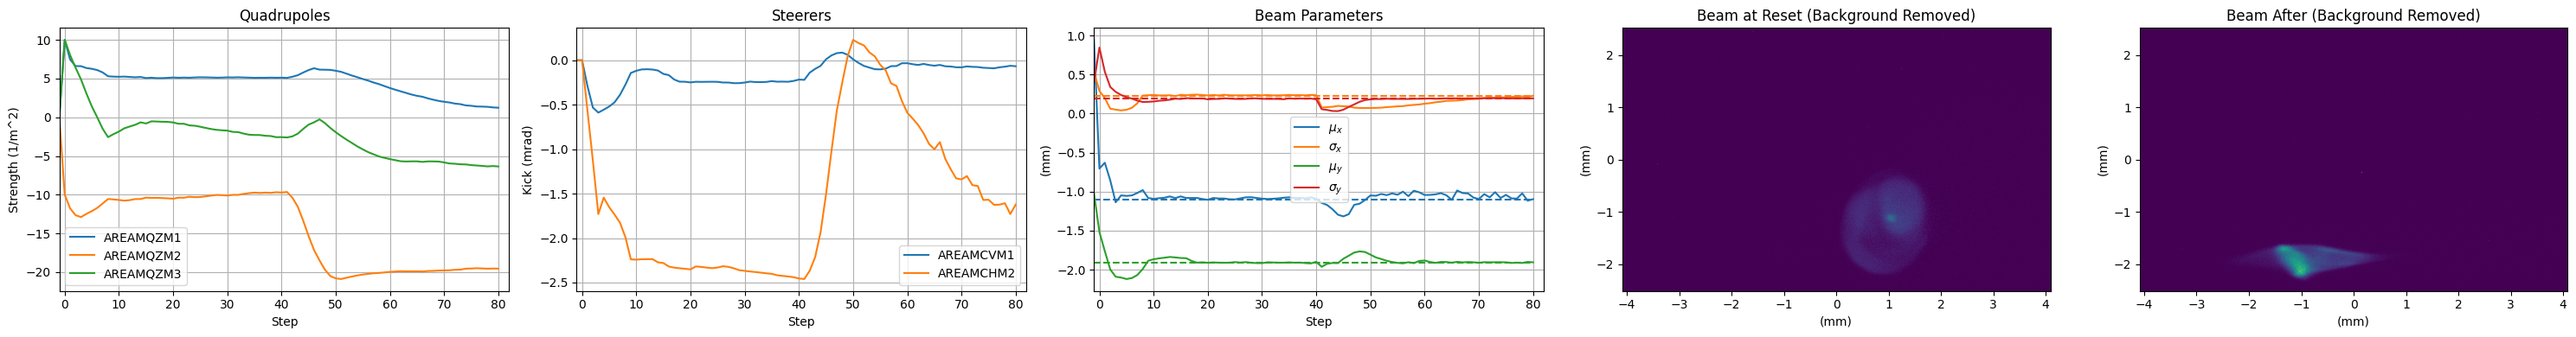

In [16]:
# Reinforcement Learning
from ea_optimize import optimize_donkey

optimize_donkey(
    target_mu_x=target_mu_x,
    target_sigma_x=target_sigma_x,
    target_mu_y=target_mu_y,
    target_sigma_y=target_sigma_y,
    target_mu_x_threshold=target_mu_x_threshold,
    target_mu_y_threshold=target_mu_y_threshold,
    target_sigma_x_threshold=target_sigma_x_threshold,
    target_sigma_y_threshold=target_sigma_y_threshold,
    max_steps=80,
    model_name="polished-donkey-996",
    logbook=True,
    data_log_dir=f"data/bo_vs_rl/real/rl/{datetime.now():%Y%m%d%H%M}_{comment}",
    progress_bar=True,
    callback=None,
)


In [8]:
# from ea_optimize import ARESEADOOCS

# env = ARESEADOOCS(magnet_init_mode="constant", magnet_init_values=np.zeros(5))
# env.reset()


In [9]:
# # Bayesian Optimisation
# from ea_bo import optimize

# optimize(
#     target_mu_x=target_mu_x,
#     target_sigma_x=target_sigma_x,
#     target_mu_y=target_mu_y,
#     target_sigma_y=target_sigma_y,
#     target_mu_x_threshold=target_mu_x_threshold,
#     target_mu_y_threshold=target_mu_y_threshold,
#     target_sigma_x_threshold=target_sigma_x_threshold,
#     target_sigma_y_threshold=target_sigma_y_threshold,
#     max_steps=75,
#     model_name="Bayesian Optimisation",
#     logbook=True,
#     data_log_dir=f"data/bo_vs_rl/real/bo_ucb/{datetime.now():%Y%m%d%H%M}_{comment}",
#     progress_bar=True,
#     callback=None,
#     acquisition="UCB",
#     init_x=None,
#     init_samples=5,
#     filter_action=None,
#     magnet_init_values=np.array([10, -10, 0, 10, 0]),
# )


In [10]:
# from ea_optimize import ARESEADOOCS

# env = ARESEADOOCS(magnet_init_mode="constant", magnet_init_values=np.zeros(5))
# env.reset()


In [11]:
# Reinforcement Learning with BO takeover
# from ea_rlbo import optimize_donkey_bo_combo

# bo_takeover = 0.00015

# optimize_donkey_bo_combo(
#     target_mu_x=target_mu_x,
#     target_sigma_x=target_sigma_x,
#     target_mu_y=target_mu_y,
#     target_sigma_y=target_sigma_y,
#     target_mu_x_threshold=target_mu_x_threshold,
#     target_mu_y_threshold=target_mu_y_threshold,
#     target_sigma_x_threshold=target_sigma_x_threshold,
#     target_sigma_y_threshold=target_sigma_y_threshold,
#     max_steps=50,
#     model_name="polished-donkey-996",
#     logbook=True,
#     data_log_dir=f"data/bo_vs_rl/real/rl_bo_takeover_{bo_takeover}/{datetime.now():%Y%m%d%H%M}_{comment}",
#     progress_bar=True,
#     callback=None,
#     acquisition="UCB",
#     rl_steps=10,
#     bo_takeover=bo_takeover,
#     beta=0.01,
#     stepsize=0.05,
# )
